# M5 - W1 Assignment: Churn Problem Part 1

In this first week of the new module, we will be using a Churn problem because it is one of the most pressing issues in different industries. We will be using the following data set: https://www.kaggle.com/blastchar/telco-customer-churnLinks to an external site. and we'll be using the same data set for next week as well. So the next assignment will build on this one. 

In this first half, we will explore the dataset a bit using most of what we learnt until now and start preparing everything for implementing and testing our models. 
For this week, consider the following questions. Feel free to answer them via a notebook, where you tell your story using a mix of markdown, code and visualisation. 

Have a quick overview of the features and implement a “cleaning process”. Make sure this part of the code is well organised, if possible make this an object-oriented exercise.

Explain the process that needs to happen for each feature before you train your model. Also, think about how future observations might be different from the ones you have! Be creative. 

E.g: You have a gender column that currently holds the values “Male” and “Female”. Is it possible that I receive an observation with “M” or “F”, if so, how do I plan to take care of this? 

Choose one metric to evaluate the different models you will train and explain why you are choosing that instead of other metrics. You can try a few base models but model performance is not of prime importance yet.  

# PART 1 : CLEANING PROCESS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


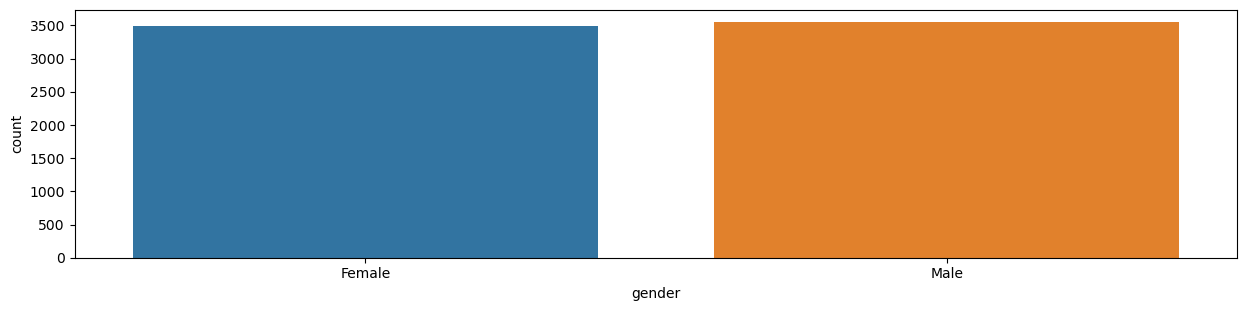

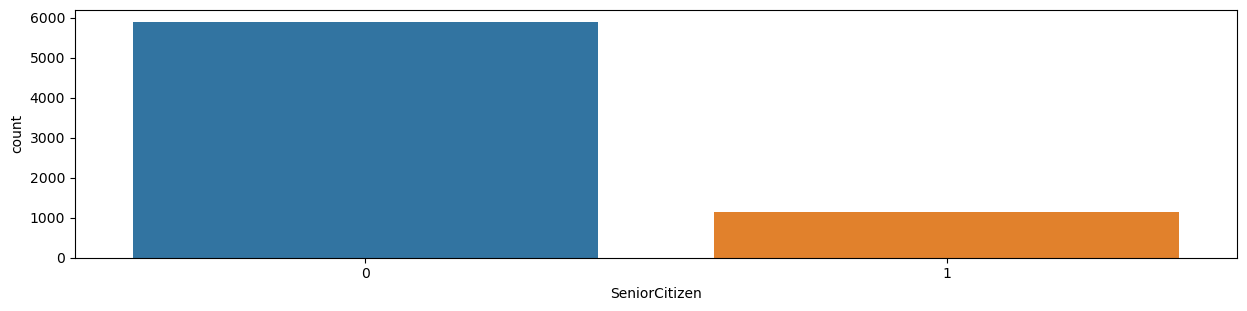

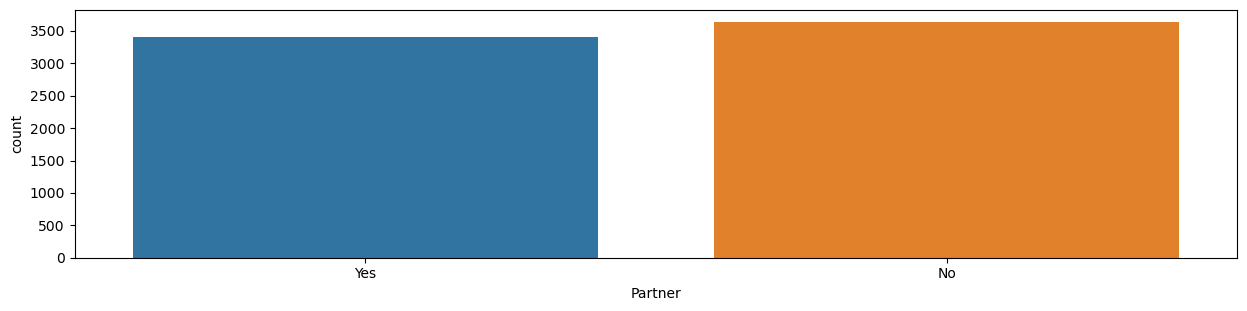

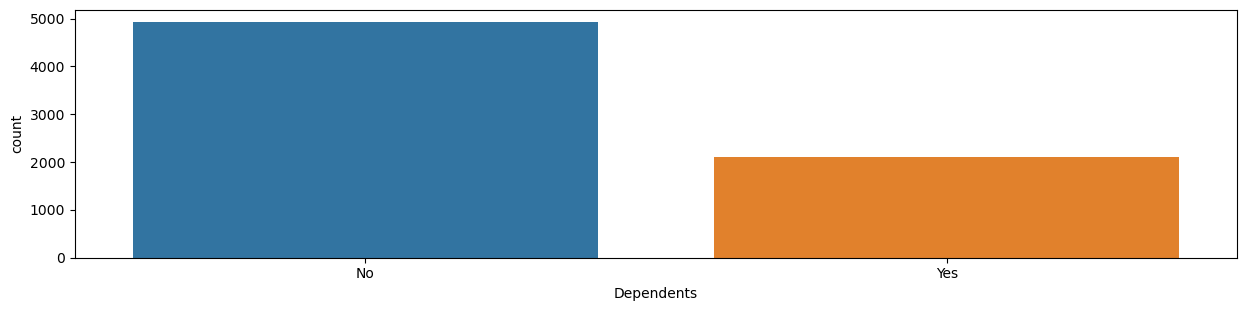

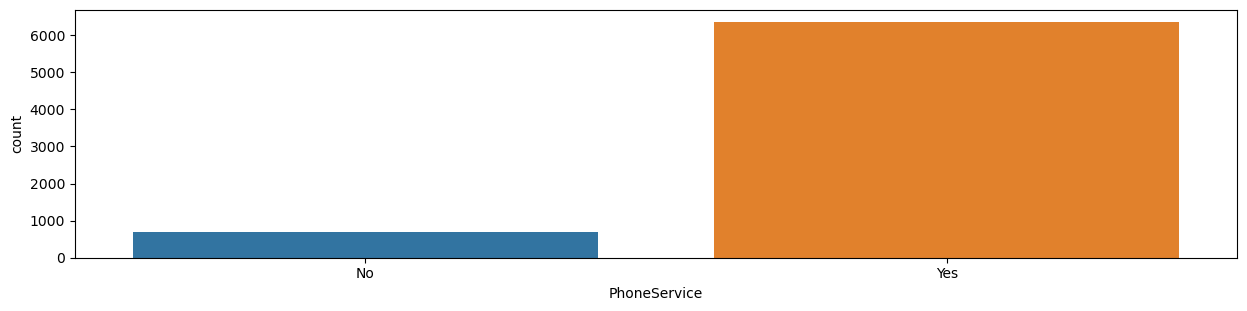

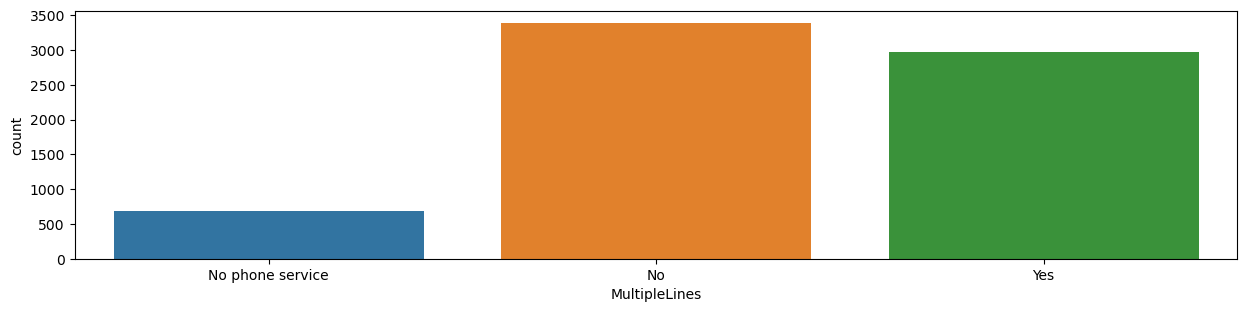

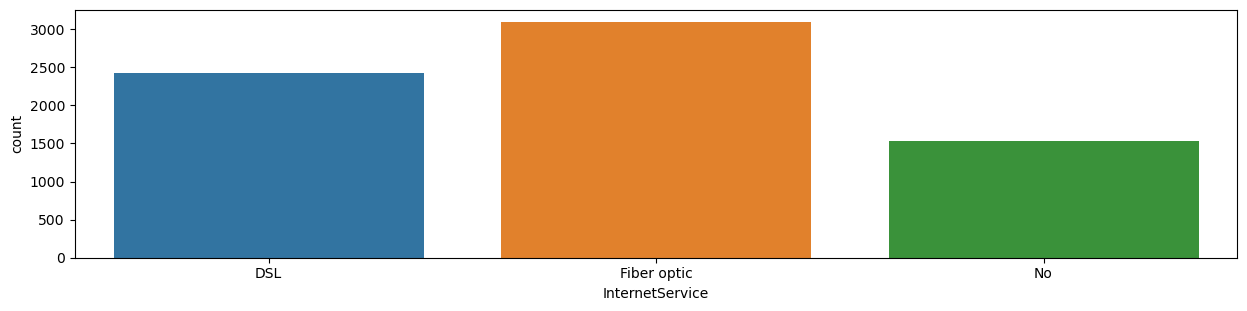

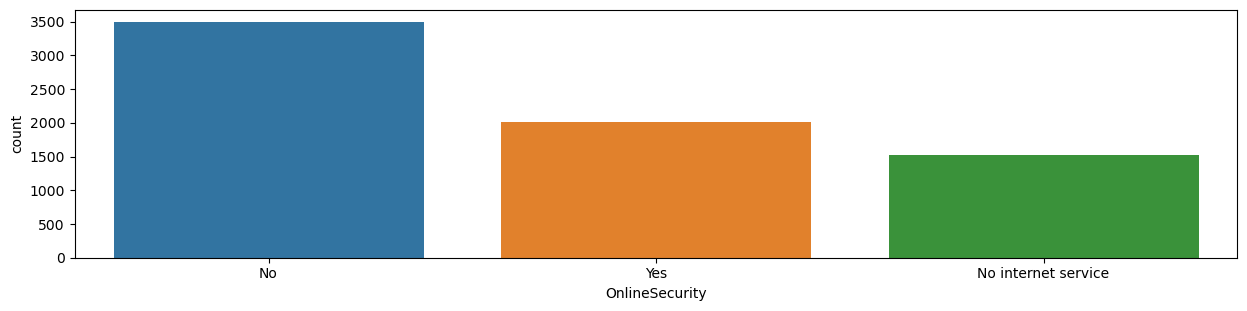

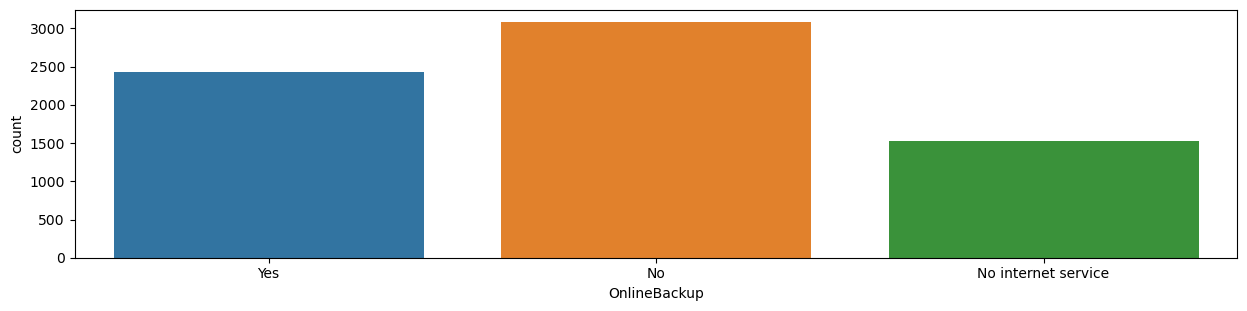

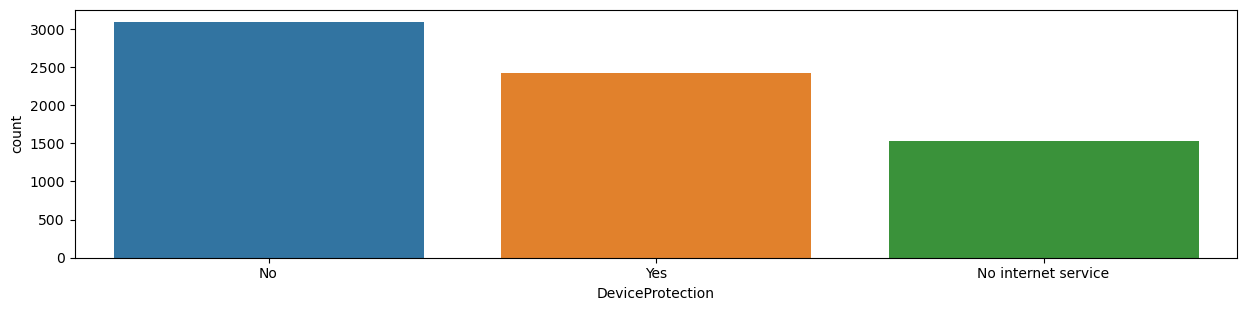

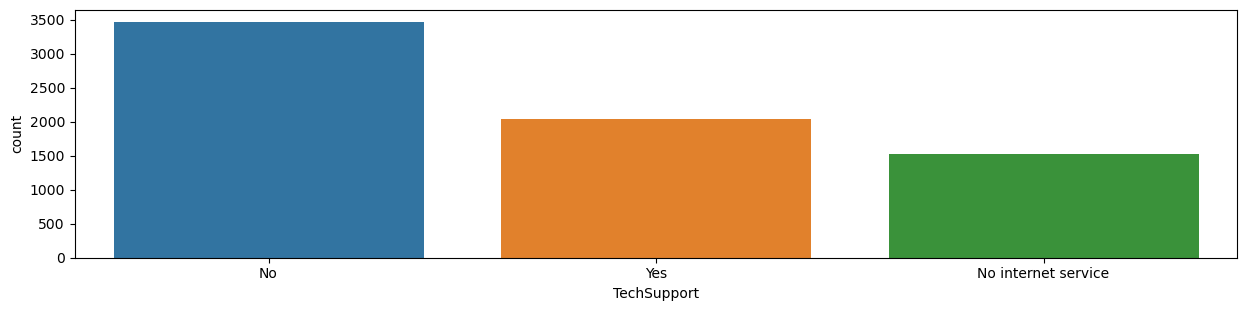

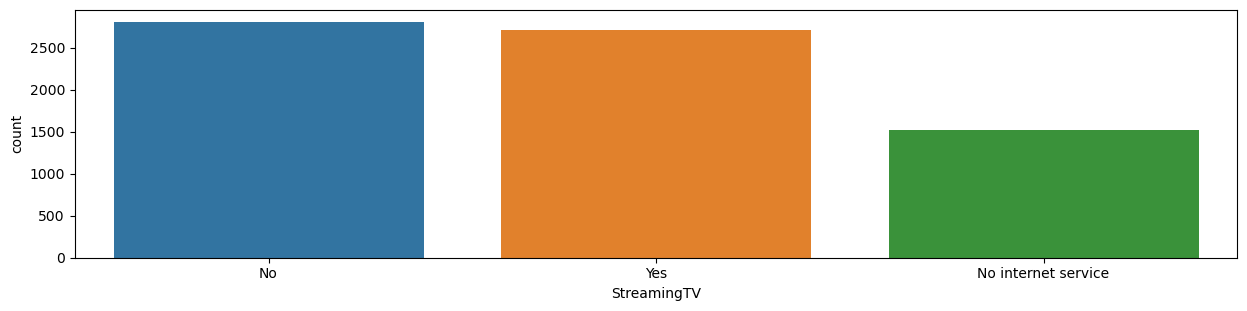

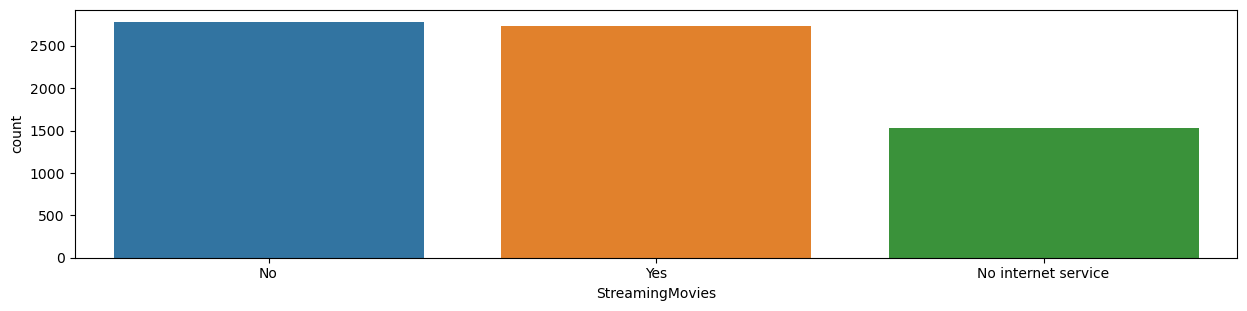

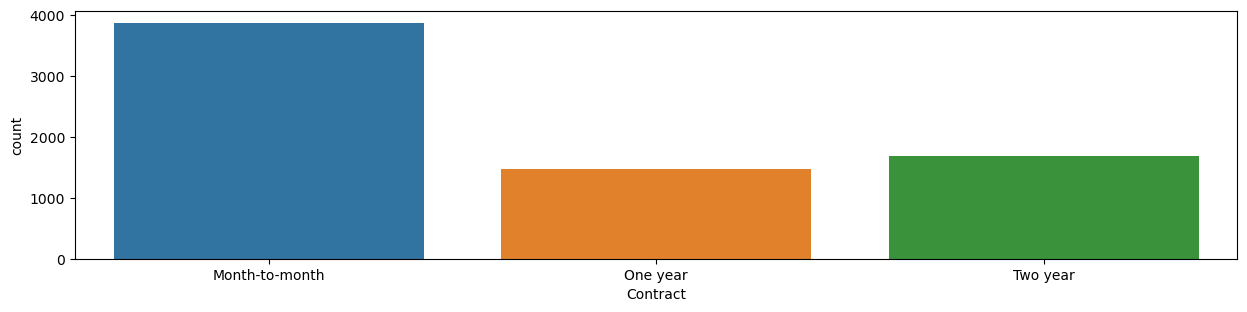

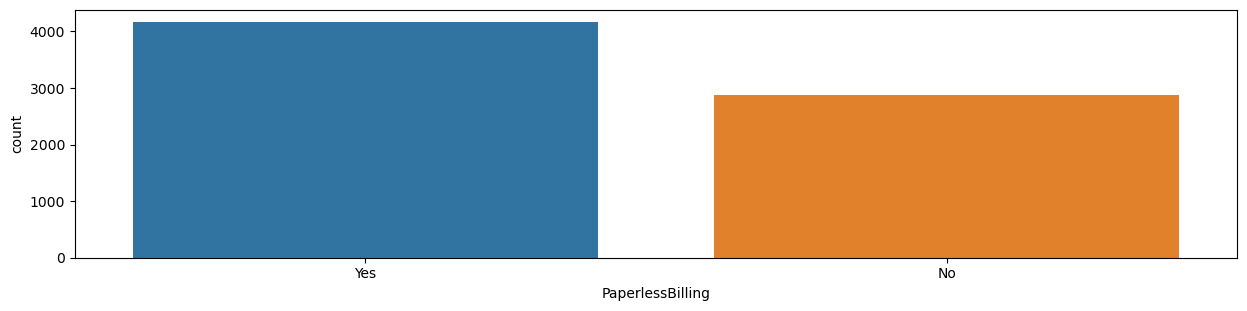

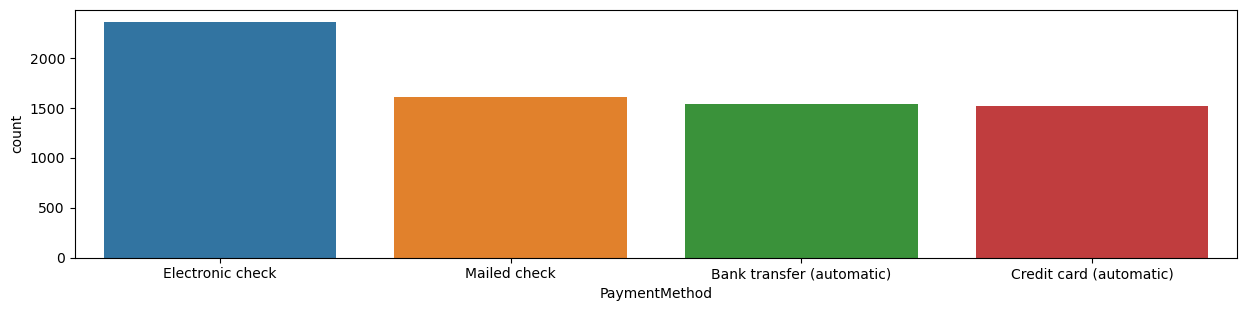

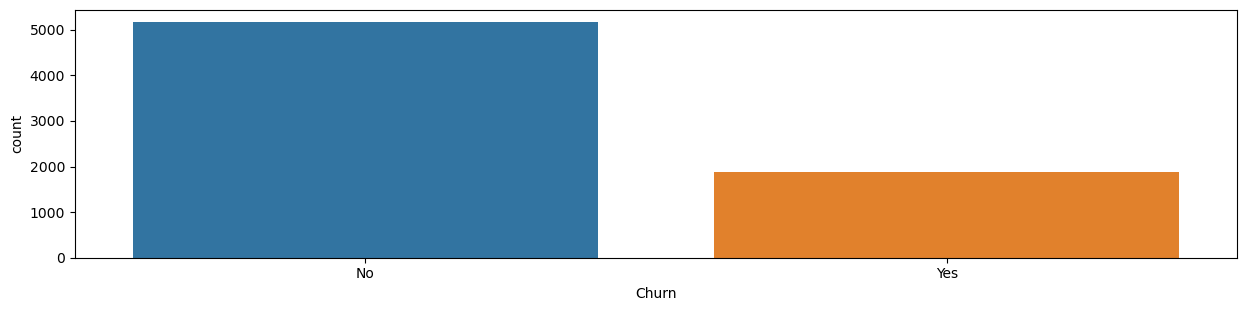

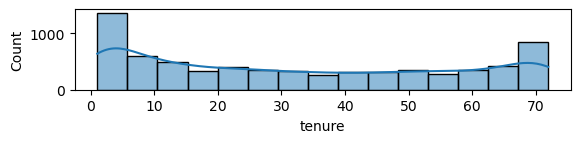

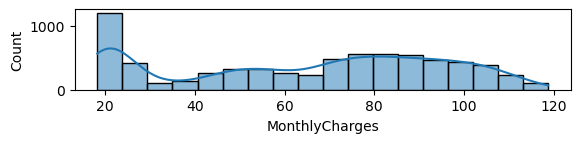

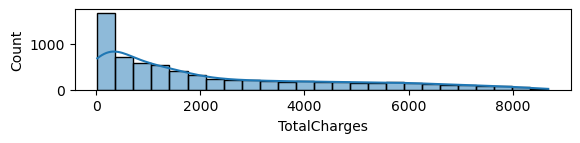

In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class ChurnProblem:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        
    def load_data(self):
        """Loads the data from the file path"""
        file_dir = os.path.dirname(self.file_path)
        os.chdir(file_dir)
        self.df = pd.read_csv(self.file_path)
        
    def check_duplicates(self):
        """Checks if there are any duplicates in the data"""
        return self.df.duplicated().any()
        
    def check_missing_values(self):
        """Checks if there are any missing values in the data"""
        return self.df.isna().any()
        
    def show_data_info(self):
        """Displays information about the data"""
        return self.df.info()
        
    def remove_customer_id(self):
        """Removes the customerID column from the data"""
        self.df.drop(columns=['customerID'], inplace=True)
        
    def identify_categorical_cols(self):
        """
        Identifies the columns in the data that have
        4 or fewer unique values, indicating they are categorical
        """
        categorical_cols = []
        for col in self.df.columns:
            if self.df[col].nunique() <= 4:
                categorical_cols.append(col)
        return categorical_cols
        
    def plot_categorical_cols(self, categorical_cols):
        """
        Plots a countplot for each of the categorical columns
        """
        index = 0
        for col in self.df.columns:
            if col in categorical_cols:
                plt.figure(figsize=(15, 65))
                plt.subplot(len(categorical_cols), 1, index+1)
                sns.countplot(x=self.df[col])
                plt.show()
                index += 1
                
    def clean_total_charges(self):
        """
        Replaces any empty strings in the TotalCharges column with NaN,
        then drops any rows with missing values in that column, and
        finally converts the column to float data type
        """
        self.df['TotalCharges'] = self.df['TotalCharges'].replace(" ", np.nan)
        self.df.dropna(inplace=True)
        self.df['TotalCharges'] = self.df['TotalCharges'].astype(float, errors='ignore')
        
    def plot_numerical_cols(self, categorical_cols):
        """
        Plots a histogram for each of the numerical columns
        """
        index = 0
        for col in self.df.columns:
            if col not in categorical_cols:
                plt.subplot(4, 1, index+1)
                sns.histplot(data=self.df[col], kde=True)
                plt.show()
                index += 1
                
                
churn = ChurnProblem("C:\\Users\\ManosIeronymakisProb\\OneDrive - Probability\\Bureaublad\\ELU\\M5 - W1 Assignment Churn Problem Part 1\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn.load_data()
churn.check_duplicates()
churn.check_missing_values()
churn.show_data_info()
churn.remove_customer_id()
categorical_cols = churn.identify_categorical_cols()
churn.plot_categorical_cols(categorical_cols)
churn.clean_total_charges()
churn.plot_numerical_cols(categorical_cols)

During this data cleaning process, we have obtained some fundamental information about the dataset. I have presented a visual representation of all the columns, and we can distinctly observe all the necessary details to proceed with our analysis.

************************

# PART 2 : PREPROCESSING OF FEATURES BEFORE MODEL TRAINING

In this section, I will outline the necessary steps to be taken for each feature in the dataset before proceeding with the model training phase.

customerID: This column is just an identifier for each customer and does not provide any valuable information for modeling. Therefore, it should be removed.

gender: This is a categorical feature with two possible values: Male and Female. We can map these values to binary 0 and 1 for easier processing by the model.

SeniorCitizen: This is a binary feature indicating whether the customer is a senior citizen or not. We can map the values to 0 and 1 accordingly.

Partner: This is a binary feature indicating whether the customer has a partner or not. We can map the values to 0 and 1 accordingly.

Dependents: This is a binary feature indicating whether the customer has dependents or not. We can map the values to 0 and 1 accordingly.

tenure: This is a numerical feature indicating the number of months the customer has been with the company.

PhoneService: This is a binary feature indicating whether the customer has phone service or not. We can map the values to 0 and 1 accordingly.

MultipleLines: This is a categorical feature indicating whether the customer has multiple phone lines or not. The possible values are: No phone service, No, and Yes. We can map these values to binary 0 and 1.

InternetService: This is a categorical feature indicating the type of internet service the customer has. The possible values are: DSL, Fiber optic, and No. We can map these values to binary 0 and 1.

OnlineSecurity: This is a categorical feature indicating whether the customer has online security or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

OnlineBackup: This is a categorical feature indicating whether the customer has online backup or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

DeviceProtection: This is a categorical feature indicating whether the customer has device protection or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

TechSupport: This is a categorical feature indicating whether the customer has tech support or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

StreamingTV: This is a categorical feature indicating whether the customer has streaming TV or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

StreamingMovies: This is a categorical feature indicating whether the customer has streaming movies or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

Contract: This is a categorical feature indicating the type of contract the customer has. The possible values are: Month-to-month, One year, and Two year. We can map these values to binary 0 and 1.

PaperlessBilling: This is a binary feature indicating whether the customer has paperless billing or not. We can map the values to 0 and 1 accordingly.

PaymentMethod: This is a categorical feature indicating the payment method the customer uses. The possible values are: Electronic check, Mailed check, Bank transfer (automatic), and Credit card (automatic). We can map these values to binary 0 and 1.

MonthlyCharges: This column contains the monthly charges paid by each customer. Since this is a numeric column, we don't need to do much cleaning. However, we should check for missing values and outliers. If there are missing values, we can either remove the rows or impute the missing values with the median or mean value. If there are outliers, we can either remove them or transform them using techniques like Winsorization.

TotalCharges: This column contains the total charges paid by each customer. Like MonthlyCharges, this is a numeric column that we should check for missing values and outliers. If there are missing values, we can impute them with the median or mean value. However, we should be careful not to remove rows with missing values in this column, as they may represent new customers who have not yet paid any charges. If there are outliers, we can either remove them or transform them using techniques like Winsorization.

Churn: This column contains whether or not each customer churned, i.e. whether they cancelled their service or not. This is a categorical column that we should encode as numerical values. We can encode it as a binary variable, where 0 represents no churn and 1 represents churn. We can also check for missing values in this column, and either remove the rows or impute the missing values with the most frequent value.

************************

# PART 3 : MODELS AND METRIC

This code demonstrates how preprocessing steps can clean and prepare data for machine learning model training by handling missing values and converting categorical data into a format that can be used by machine learning models. These steps are essential for accurate model predictions and improving the overall performance of the model.

In [9]:
import pandas as pd
import os

os.chdir("C:\\Users\\ManosIeronymakisProb\\OneDrive - Probability\\Bureaublad\\ELU\\M5 - W1 Assignment Churn Problem Part 1")
filepath =  "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(filepath)


# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Create dummy variables for all categorical columns
df = pd.get_dummies(df, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

# Convert 'Churn' column to binary
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Check for missing values in MonthlyCharges and TotalCharges
print(df[['MonthlyCharges', 'TotalCharges']].isnull().sum())

# Impute missing values in TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


MonthlyCharges    0
TotalCharges      0
dtype: int64


Train-test split

In [10]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic regression model

In [11]:
# Train and evaluate logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.8168914123491838


C:\Users\ManosIeronymakisProb\.conda\envs\master\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN model

In [12]:
# Train and evaluate KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
print("KNN Accuracy:", knn_acc)

KNN Accuracy: 0.7764371894960965


Decision tree model

In [13]:
# Train and evaluate decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 0.7253371185237757


Random forest model

In [14]:
# Train and evaluate random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.7906316536550745


SVM model

In [15]:
# Train and evaluate SVM model
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.7352732434350603


****************************

# CONCLUSION

The choice of evaluation metric depends on the problem we are trying to solve and the goals we want to achieve. 
In this case, since the goal is to predict customer churn, a common metric to evaluate binary classification models is accuracy, which measures the proportion of correct predictions over the total number of predictions.